In [4]:
import torch as t
import torch
from torch import einsum
from einops import rearrange, reduce, repeat
import mlab_tests

In [3]:
from torchvision import models

torchvision_resnet34 = models.resnet34(pretrained=True)
resnet34 = torchvision_resnet34
_ = resnet34.eval()

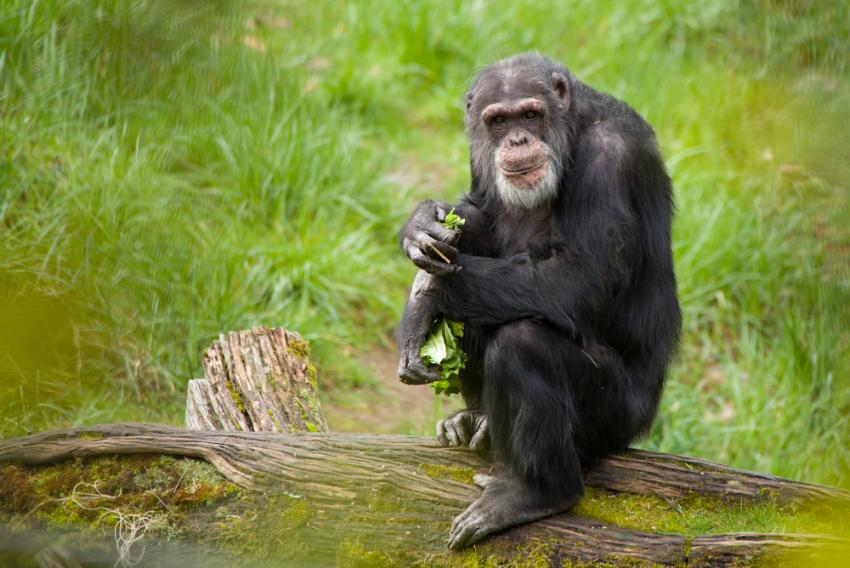

In [1]:
from PIL import Image
import requests 
from io import BytesIO
from IPython.display import display

def load_image(url):
  response = requests.get(url)
  return Image.open(BytesIO(response.content))

url = "https://www.oregonzoo.org/sites/default/files/styles/article-full/public/animals/H_chimpanzee%20Jackson.jpg"
img = load_image(url)
img

In [12]:
import torch
from torchvision import transforms

inputs = transforms.ToTensor()(img).unsqueeze_(0)
print(inputs.shape)
outputs = resnet34(inputs)
outputs = outputs
#This is the output of the classification logits, which is of shape (batch, num_classes = 1000 by default) -> So 1 thousand neurons in the last layer? 
#TODO => YES! I was right, 1000 classes
print(outputs.shape)


torch.Size([1, 3, 568, 850])
torch.Size([1, 1000])


In [8]:
imagenet_labels_url = 'https://gist.githubusercontent.com/yrevar/942d3a0ac09ec9e5eb3a/raw/238f720ff059c1f82f368259d1ca4ffa5dd8f9f5/imagenet1000_clsidx_to_labels.txt'
response = requests.get(imagenet_labels_url)
imagenet_labels = eval(response.text)
print(imagenet_labels[10])

brambling, Fringilla montifringilla


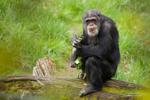

05.10% | chimpanzee, chimp, Pan troglodytes
01.48% | siamang, Hylobates syndactylus, Symphalangus syndactylus
01.32% | langur
...
00.00350% | pomegranate
00.00344% | rotisserie
00.00322% | admiral



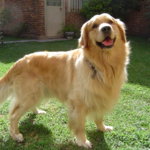

26.91% | golden retriever
05.63% | Great Pyrenees
04.29% | collie
...
00.00061% | gyromitra
00.00059% | stinkhorn, carrion fungus
00.00054% | bolete



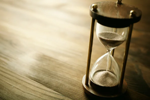

97.92% | hourglass
00.08% | beaker
00.07% | guillotine
...
00.00003% | sea slug, nudibranch
00.00003% | pickup, pickup truck
00.00003% | flatworm, platyhelminth



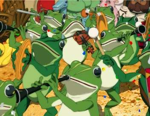

23.07% | comic book
17.85% | tray
13.01% | book jacket, dust cover, dust jacket, dust wrapper
...
00.00009% | puffer, pufferfish, blowfish, globefish
00.00007% | sports car, sport car
00.00004% | French loaf



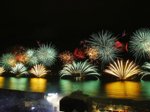

07.94% | seashore, coast, seacoast, sea-coast
07.28% | lakeside, lakeshore
04.36% | sandbar, sand bar
...
00.00210% | fig
00.00181% | cheeseburger
00.00138% | disk brake, disc brake



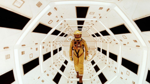

03.66% | maze, labyrinth
02.21% | vault
01.64% | dome
...
00.00203% | koala, koala bear, kangaroo bear, native bear, Phascolarctos cinereus
00.00191% | jacamar
00.00137% | jellyfish



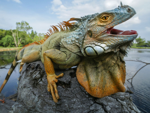

01.08% | common iguana, iguana, Iguana iguana
00.98% | bassinet
00.86% | mosquito net
...
00.00972% | police van, police wagon, paddy wagon, patrol wagon, wagon, black Maria
00.00787% | gyromitra
00.00608% | slot, one-armed bandit



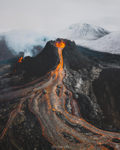

11.00% | volcano
02.99% | valley, vale
02.99% | sandbar, sand bar
...
00.00184% | bolete
00.00184% | tiger beetle
00.00102% | koala, koala bear, kangaroo bear, native bear, Phascolarctos cinereus



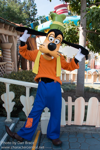

10.24% | picket fence, paling
07.19% | umbrella
02.42% | military uniform
...
00.00026% | red-breasted merganser, Mergus serrator
00.00022% | leafhopper
00.00021% | mud turtle



In [13]:
urls = [
    "https://www.oregonzoo.org/sites/default/files/styles/article-full/public/animals/H_chimpanzee%20Jackson.jpg",
    "https://anipassion.com/ow_userfiles/plugins/animal/breed_image_56efffab3e169.jpg",
    "https://static5.depositphotos.com/1017950/406/i/600/depositphotos_4061551-stock-photo-hourglass.jpg",
    "https://img.nealis.fr/ptv/img/p/g/1465/1464424.jpg",
    "http://www.tudobembresil.com/wp-content/uploads/2015/11/nouvelancopacabana.jpg",
    "https://ychef.files.bbci.co.uk/976x549/p0639ffn.jpg",
    "https://www.thoughtco.com/thmb/Dk3bE4x1qKqrF6LBf2qzZM__LXE=/1333x1000/smart/filters:no_upscale()/iguana2-b554e81fc1834989a715b69d1eb18695.jpg",
    "https://i.redd.it/mbc00vg3kdr61.jpg",
    "https://static.wikia.nocookie.net/disneyfanon/images/a/af/Goofy_pulling_his_ears.jpg",
]

def show_classes_probabilities(urls, model, k=3):
    for url in urls:
        img = load_image(url)
        model.eval()

        inputs = transforms.ToTensor()(img).unsqueeze_(0)
        outputs = model(inputs)
        probs = torch.softmax(outputs, -1).flatten()
        sorted_probs, sorted_idxs = probs.sort(descending=True)
        sorted_probs = [p.item() for p in sorted_probs]
        sorted_classes = [imagenet_labels[idx.item()] for idx in sorted_idxs]

        small_img = img.copy()
        small_img.thumbnail((150, 150))
        display(small_img)
        print(
            *(f'{100*prob:05.2f}% | {label}' for prob, label in zip(sorted_probs[:k], sorted_classes[:k])),
            '...',
            *(f'{100*prob:08.5f}% | {label}' for prob, label in zip(sorted_probs[-k:], sorted_classes[-k:])),
            sep='\n',
            end='\n\n',
        )

show_classes_probabilities(urls, torchvision_resnet34)

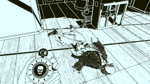

04.72% | envelope
03.61% | spider web, spider's web
02.40% | tray
...
00.00084% | ruddy turnstone, Arenaria interpres
00.00069% | drake
00.00064% | lion, king of beasts, Panthera leo



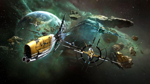

11.20% | gar, garfish, garpike, billfish, Lepisosteus osseus
06.30% | wreck
02.64% | water snake
...
00.00132% | yellow lady's slipper, yellow lady-slipper, Cypripedium calceolus, Cypripedium parviflorum
00.00114% | Japanese spaniel
00.00041% | koala, koala bear, kangaroo bear, native bear, Phascolarctos cinereus



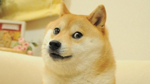

02.43% | Eskimo dog, husky
01.96% | Chihuahua
01.90% | Siberian husky
...
00.00139% | thresher, thrasher, threshing machine
00.00126% | common newt, Triturus vulgaris
00.00083% | gyromitra



In [154]:
my_urls = ["https://m.media-amazon.com/images/M/MV5BYzFkOTQzMmEtYjM1NC00N2YzLTlhZmMtMTc1ODc2NDkzMmYxXkEyXkFqcGdeQVRoaXJkUGFydHlJbmdlc3Rpb25Xb3JrZmxvdw@@._V1_.jpg", 
"https://www.pcgamesn.com/wp-content/uploads/2020/09/eve-online-gnosis-praxis-900x506.jpg",
"https://wompampsupport.azureedge.net/fetchimage?siteId=7575&v=2&jpgQuality=100&width=700&url=https%3A%2F%2Fi.kym-cdn.com%2Fentries%2Ficons%2Foriginal%2F000%2F013%2F564%2Fdoge.jpg"
]

show_classes_probabilities(my_urls, torchvision_resnet34)


Implementing ResNet building blocks
We now start implementing our own ResNet model.



# Implementing ResNet building blocks
We now start implementing our own ResNet model.

## Operating on tensors: as_strided and einsum
To implement some of our building blocks, we will use the following functions:

- `torch.einsum`: implements summations over tensor indices using Einstein notation. You can read more about it here:
  - https://pytorch.org/docs/stable/generated/torch.einsum.html
  - https://ajcr.net/Basic-guide-to-einsum/
- `torch.as_strided`: PyTorch tensors data are physically stored as 1-d arrays, and the shape and stride abstractions describe a multidimensional indexing API into this data. The shape (or size) is an N-tuple describing the number of valid indices for each dimension. The stride is an N-tuple corersponding to how many cells to jump in the 1-d physical array when the index of each dimension is incremented. The function .as_strided can then be used to change the shape and stride of a tensor without changing the underlying data. This can be used to efficiently implement many operations on tensors. You can read more about it here:
  - https://pytorch.org/docs/stable/generated/torch.as_strided.html
  - https://jott.live/markdown/as_strided
We will start this section by familiarizing ourselves with these functions by reimplementing some matrix operations.

### Step 1: as_strided arguments
For each test case below, change the arguments size and stride, so that a call of torch.as_strided(test_input_a, size=size, stride=stride) matches the desired output.

In [179]:
from collections import namedtuple

test_input_a = torch.tensor([[ 0,  1,  2,  3,  4],
                             [ 5,  6,  7,  8,  9],
                             [10, 11, 12, 13, 14],
                             [15, 16, 17, 18, 19]])

print(test_input_a.stride())

TestCase = namedtuple('TestCase', ['output', 'size', 'stride'])

test_cases = [
  TestCase(
    output=torch.tensor([0, 1, 2, 3]),
    size=(1,4),
    # cuz size is only 1,4, the 
    stride=(0,1),
  ),
  TestCase(
    output=torch.tensor([[0, 1, 2],
                         [5, 6, 7]]),
    size=(2,3),
    stride=(5,1),
  ),
  TestCase(
    output=torch.tensor([[0, 0, 0],
                         [11, 11, 11]]),
    size=(2,3),
    stride=(11,0),
  ),
  TestCase(
    output=torch.tensor([0, 6, 12, 18]),
    size=(1,4),
    stride=(432423,6),
  ),
  TestCase(
    output=torch.tensor([[[0, 1, 2],
                          [9, 10, 11]]]),
    size=(1,2,3),
    stride=(3420,9,1),
  ),
  TestCase(
    output=torch.tensor([[[[0, 1],
                           [2, 3]],
                          [[4, 5],
                           [6, 7]]],
                         [[[12, 13],
                           [14, 15]],
                          [[16, 17],
                           [18, 19]]]]),
    size=(1,2,2,2,2),
    stride=(1,12,4,2,1),
  ),
]

def is_equal_test(*, output, expected, test_name='Test'):
    successful = torch.allclose(expected.to(float), output.to(float))
    if successful:
        print(f'{test_name} passed!')
    else:
        print(f'{test_name} failed')
        print(f'Output:\n{output}')
        print(f'Expected:\n{expected}')

for i, (expected, size, stride) in enumerate(test_cases):
    output = torch.as_strided(test_input_a, size=size, stride=stride)
    is_equal_test(test_name=i, output=output, expected=expected)


(5, 1)
0 passed!
1 passed!
2 passed!
3 passed!
4 passed!
5 passed!


0 passed!
1 passed!
2 passed!
3 passed!
4 passed!
5 passed!


### Step 2: as_strided trace
Implement a function that receives a square matrix (as a 2d tensor) and returns its trace) using torch.as_strided and torch.sum



In [152]:
def strided_trace(a: t.Tensor):
  # preprogrammed = t.Tensor([[1,2, 3],[4,5, 6],[7,8,9]])
  size = (min(a.shape),1)
  zeros_dim = [0]*len(a.shape)
  zeros_dim[0] = a.shape[-1]+1
  stride = tuple(zeros_dim)

  return t.sum(t.as_strided_( 
    a,
    size,
    stride
  ))


In [153]:
def einsum_trace(a):
    return torch.einsum('ij->', a)

a = torch.randn(10, 10)
assert torch.allclose(strided_trace(a), einsum_trace(a), rtol=1e-4, atol=1e-4)


### Step 3: as_strided matmul
Implement a function that receives two matrices (as 2d tensors) and returns their multiplication, using `torch.as_strided`, `torch.sum`, and elementwise multiplication.

In [267]:
def strided_matmul(a, b):
    i, j = a.shape
    k = b.shape[-1]

    a_mod = t.as_strided(a, (i, j, k), (j, 1, 0))

    b_mod = t.as_strided(b, (i, j, k), (0, k, 1))
    # print(a_mod*b_mod)

    return t.sum(a_mod*b_mod, dim=-2)

#TODO: Why is 0 not just the sum of the lowest dimension? Is it outer bracket based? 
# WOW WTF: 
# One thing that is not mentioned explicitly in the documentation is: you can sum across the last array-dimension by using -1 (or the second-to last dimension, with -2, etc.)

a = t.tensor([[1,2,3], [4,5,6]])
b = t.tensor([[7,8],[9,10],[11,12]])

print(strided_matmul(a, b))

tensor([[ 58,  64],
        [139, 154]])


In [268]:
def einsum_matmul(a, b):
    return torch.einsum('ik,kj->ij', a, b)

a = torch.randn(10, 5)
b = torch.randn(5, 15)
assert torch.allclose(strided_matmul(a, b), einsum_matmul(a, b), rtol=1e-4, atol=1e-4)


### Step 4: conv1d arguments
To get familiarity with conv1d, replace the indicated variables to pass the tests below.

In [271]:
from torch.nn.functional import conv1d as torch_conv1d
from torch.nn.functional import conv2d as torch_conv2d

input = torch.tensor([[[1, 2, 3, 4]]])
weights = torch.tensor([[[1, 3]]])
output = torch_conv1d(input, weights)
expected = torch.tensor([7.0, 11.0, 15.0])
is_equal_test(output=output, expected=expected)

Test passed!


In [291]:
input = torch.tensor([[[105, 15, 0, 0, 6, 2, 8, 4]]])
weights = torch.tensor([[[2, 0, -2]]])
output = torch_conv1d(input, weights)
expected = torch.tensor([[[210, 30, -12, -4, -4, -4]]])
is_equal_test(output=output, expected=expected)

Test passed!


In [294]:
input = torch.tensor([[[1, 2, 3],
                       [4, 5, 6]],
                      [[1, 1, 1],
                       [2, 3, 2]]])
weights = torch.tensor([[[1], [2]]]) 
output = torch_conv1d(input, weights)
expected = torch.tensor([[[9, 12, 15]],
                         [[5, 7, 5]]])
is_equal_test(output=output, expected=expected)

Test passed!


# Step 5: conv1d
Implement 1d convolutions using torch.as_strided and torch.einsum.

In [449]:
# x : (batchsize, in_channels, seqlen), weights : (out_channels, in_channels, kernel_width)
import numpy as np

def conv1d_minimal(x: t.tensor, weights):
    # x : (b, channel, h)
    # weights: (co, ci, kernal_size)
    # co: number of channel outputed by the weights, outputting co # of channels / features / filters
    # ci: number of channels inputed, over N input channels / signals / variables
    # kernal size is the length i guess in conv1d
    b, ci, h = x.shape
    print(f'OK, there are {b} batches, {ci} color channels, {h} size of image')
    co, ci, k_s = weights.shape
    print(f'OK, there are {co} out_channels, {ci} color channels, {k_s} size of \"scanner\"')

    len_cov = h - k_s + 1
    cur_s1, cur_s2, cur_s3 = x.stride()
    print(cur_s1, cur_s2, cur_s3)

    # #TODO why is it using ci not co? 
    #OK. Somewhat more clear, striding and messing with x, and co doesn't really concerns x -> co only enters the picture at the end during einsum -> May need to experiment
    size_conv_product = (b, ci, len_cov, k_s)
    
    whatIsThis = t.as_strided(x, size_conv_product, (cur_s1,cur_s2,1,1))

    #TODO why does this work???? torch.einsum('bcxi,oci->box', whatIsThis, weights)
    waitWhat = torch.einsum('bilk,oik->bol', whatIsThis,weights)
    return waitWhat

b = np.random.randint(1, 10)
h = np.random.randint(10, 300)
ci = np.random.randint(1, 20)
co = np.random.randint(1, 20)
kernel_size = np.random.randint(1, 10)

x = torch.randn((b, ci, h))
weights = torch.randn((co, ci, kernel_size))

my_output = conv1d_minimal(x, weights)


OK, there are 7 batches, 17 color channels, 270 size of image
OK, there are 13 out_channels, 17 color channels, 1 size of "scanner"
4590 270 1


In [533]:
def test_conv1d_minimal(my_conv, n_tests=10):
    import numpy as np
    for i in range(n_tests):
        b = np.random.randint(1, 10)
        h = np.random.randint(10, 300)
        ci = np.random.randint(1, 20)
        co = np.random.randint(1, 20)
        kernel_size = np.random.randint(1, 10)

        x = torch.randn((b, ci, h))
        weights = torch.randn((co, ci, kernel_size))

        my_output = my_conv(x, weights)

        torch_output = torch.conv1d(
            x,
            weights,
            stride=1,
            padding=0,
        )

        if not torch.allclose(my_output, torch_output, atol=1e-4, rtol=1e-4):
            print(f'Conv1d (minimal) test {i} failed.')
            print(f"Expected {torch_output.flatten()[:5]}...,")
            print(f"Got {my_output.flatten()[:5]}...")
            return
        print(f"Test {i} passed!")
    print('All tests passed!')

test_conv1d_minimal(conv1d_minimal)

OK, there are 8 batches, 7 color channels, 171 size of image
OK, there are 4 out_channels, 7 color channels, 5 size of "scanner"
1197 171 1
Test 0 passed!
OK, there are 9 batches, 9 color channels, 144 size of image
OK, there are 10 out_channels, 9 color channels, 2 size of "scanner"
1296 144 1
Test 1 passed!
OK, there are 1 batches, 12 color channels, 79 size of image
OK, there are 15 out_channels, 12 color channels, 2 size of "scanner"
948 79 1
Test 2 passed!
OK, there are 5 batches, 14 color channels, 121 size of image
OK, there are 2 out_channels, 14 color channels, 6 size of "scanner"
1694 121 1
Test 3 passed!
OK, there are 1 batches, 15 color channels, 113 size of image
OK, there are 13 out_channels, 15 color channels, 4 size of "scanner"
1695 113 1
Test 4 passed!
OK, there are 6 batches, 3 color channels, 17 size of image
OK, there are 9 out_channels, 3 color channels, 3 size of "scanner"
51 17 1
Test 5 passed!
OK, there are 3 batches, 2 color channels, 292 size of image
OK, the

In [510]:
# x : (batchsize, in_channels, height, width), weights : (out_channels, in_channels, kernel_height, kernel_width)

def conv2d_minimal(x, weights):
    b, ci, h, w = x.shape
    # print(
    #     f'OK, there are {b} batches, {ci} color channels, {w}x{h} sized of image')
    co, ci, h_weight, w_weight = weights.shape
    #print(f'OK, there are {co} out_channels, {ci} color channels, {w_weight}x{h_weight} size of \"scanner\"')

    step_h = h - h_weight + 1
    step_w = w - w_weight + 1

    steps_all = step_h * step_w

    # print(x.stride())
    cur_s1, cur_s2, cur_s3, cur_s4 = x.stride()
    # TODO: Figure out why is step_h and step_w not just multiplied?
    # RESOLVED: Because the shape of the naive case (1 batch 1 channel) looks like this: do a 2 by 2 thing 4 and 4 times. 
    size_conv_product = (b, ci, step_h, step_w, h_weight, w_weight)
    # print((cur_s1, cur_s2, cur_s3,1,cur_s3,1))
    # Question: Why isnt it somethingelse? The Stride.
    # Proposal: use a simple / trivial example to work out the stride
    # DONE
    whatIsThis = t.as_strided(x, size_conv_product,
                              (cur_s1, cur_s2, cur_s3, 1,cur_s3,1))

    # print(whatIsThis)

    # TODO: take 10 mins and draw the matrix out, as well as write out each step in terms of element wise multiplication (Stolen from solution code)
    waitWhat = torch.einsum('bixyhw,oihw->boxy', whatIsThis, weights)
    return waitWhat


b = 1
h = 5
w = 5
ci = 2
co = 2
kernel_size = tuple(np.random.randint(2, 3, size=(2,)))

x = torch.randn((b, ci, h, w))
weights = torch.randn((co, ci, *kernel_size))

# print(x)
# print(weights)

my_output = conv2d_minimal(
    x,
    weights
)

torch_output = torch.conv2d(
    x,
    weights
)

# print(my_output[0][0])
# print(torch_output[0][0])


In [511]:
def test_conv2d_minimal(my_conv, n_tests = 10):
    import numpy as np
    for i in range(n_tests):
        b = np.random.randint(1, 10)
        h = np.random.randint(10, 300)
        w = np.random.randint(10, 300)
        ci = np.random.randint(1, 20)
        co = np.random.randint(1, 20)
        kernel_size = tuple(np.random.randint(1, 10, size=(2,)))

        x = torch.randn((b, ci, h, w))
        weights = torch.randn((co, ci, *kernel_size))

        my_output = my_conv(
            x,
            weights
        )

        torch_output = torch.conv2d(
            x,
            weights
        )

        if not torch.allclose(my_output, torch_output, atol=1e-4, rtol=1e-4):
            print(f'Conv2d test {i} failed.')
            print(f"Expected {torch_output.flatten()[:5]}...,")
            print(f"Got {my_output.flatten()[:5]}...,")
            return
        print(f"Test {i} passed!")

    print('All tests passed!')

test_conv2d_minimal(conv2d_minimal)


Test 0 passed!
Test 1 passed!
Test 2 passed!
Test 3 passed!
Test 4 passed!
Test 5 passed!
Test 6 passed!
Test 7 passed!
Test 8 passed!
Test 9 passed!
All tests passed!


### Step7 : stride and padding
Convolutions generally take a few extra arguments, such as:

- `stride`: how many positions to increment in the input for each position increment in the output. Useful for downsampling the input. 
- SIMON: Imagines this as shoe size, and each "step" we take when moving the scanner/filter/kernal is bigger. 
- `padding`: pads the input with zeroes on each side before applying the convolution. Useful for controlling the output size.
- Uh, it just make the matrix bigger on which ever dimension by 1? forexample
`[[1,2], [3,4]]` -> with one padding looks like `[[0,1,2], [0,3,4], [0,0,0]]` ??

Add stride and padding parameters to your implementations of conv1d, conv2d.

In [639]:
def padding1d(x: t.tensor, padding: int):
    if padding < 1:
        return x
    # OK, naive try
    zeros_w_pad = t.zeros(
        (x.shape[-3], x.shape[-2], (x.shape[-1] + padding * 2)))
    # yay ugly stuff
    zeros_w_pad[:, :, padding:-padding] = x
    return zeros_w_pad

def padding2d(x: t.tensor, padding_h = 0, padding_w = 0):
    if padding_w < 1 and padding_h < 1:
        return x

    zeros_w_pad = t.zeros(
        (x.shape[-4], x.shape[-3], (x.shape[-2] + padding_h*2), (x.shape[-1] + padding_w*2)))

    # yay ugly stuff
    if padding_w == 0:
        zeros_w_pad[:, :, padding_h:-padding_h,:] = x
    elif padding_h == 0:
        zeros_w_pad[:, :, :,padding_w:-padding_w] = x
    else:
        zeros_w_pad[:, :, padding_h:-padding_h,padding_w:-padding_w] = x

    return zeros_w_pad

In [642]:
# x : (batchsize, in_channels, seq_len),
# weights : (out_channels, in_channels, kernel_width),
# stride: int
# padding: int

def conv1d(x, weights, stride=1, padding=0):
    # First, let's see how much padding is needed
    # Ok! Lets add padding to h, every single h in every channel
    b, ci, h = x.shape
    print(f'OK, there are {b} batches, {ci} color channels, {h} size of image')
    co, ci, k_s = weights.shape
    print(
        f'OK, there are {co} out_channels, {ci} color channels, {k_s} size of \"scanner\"')

    len_cov = ((h+2*padding) - k_s) // stride + 1

    x = padding1d(x, padding)

    cur_s1, cur_s2, cur_s3 = x.stride()
    print(x.stride())
    print(cur_s1, cur_s2, cur_s3)

    size_conv_product = (b, ci, len_cov, k_s)
    conv_stride = (cur_s1, cur_s2, 1 * stride, 1)
    whatIsThis = t.as_strided(x, size_conv_product, conv_stride)

    return torch.einsum('bilk,oik->bol', whatIsThis, weights)

# x : (batchsize, in_channels, height, width),
# weights : (out_channels, in_channels, kernel_height, kernel_width),
# stride: int or tuple(int, int)
# padding: int or tuple(int, int)


def conv2d(x, weights, stride=1, padding=0):
    b, ci, h, w = x.shape
    # print(
    #     f'OK, there are {b} batches, {ci} color channels, {w}x{h} sized of image')
    co, ci, h_weight, w_weight = weights.shape
    #print(f'OK, there are {co} out_channels, {ci} color channels, {w_weight}x{h_weight} size of \"scanner\"')

    step_h = h - h_weight + 1
    step_h = ((h+2*padding) - h_height) // stride + 1
    step_w = w - w_weight + 1

    # print(x.stride())
    cur_s1, cur_s2, cur_s3, cur_s4 = x.stride()
    # TODO: Figure out why is step_h and step_w not just multiplied?
    # RESOLVED: Because the shape of the naive case (1 batch 1 channel) looks like this: do a 2 by 2 thing 4 and 4 times. 
    size_conv_product = (b, ci, step_h, step_w, h_weight, w_weight)
    # print((cur_s1, cur_s2, cur_s3,1,cur_s3,1))
    # Question: Why isnt it somethingelse? The Stride.
    # Proposal: use a simple / trivial example to work out the stride
    # DONE
    whatIsThis = t.as_strided(x, size_conv_product,
                              (cur_s1, cur_s2, cur_s3, 1,cur_s3,1))

    # print(whatIsThis)

    # TODO: take 10 mins and draw the matrix out, as well as write out each step in terms of element wise multiplication (Stolen from solution code)
    waitWhat = torch.einsum('bixyhw,oihw->boxy', whatIsThis, weights)
    return waitWhat


In [643]:
#@title conv2d fuzz tests { form-width:"200px" }

def test_conv1d(my_conv, n_tests = 10):
    import numpy as np

    for i in range(n_tests):
        b = np.random.randint(1, 10)
        h = np.random.randint(10, 300)
        ci = np.random.randint(1, 20)
        co = np.random.randint(1, 20)
        stride = np.random.randint(1, 5)
        padding = np.random.randint(0, 5)
        kernel_size = np.random.randint(1, 10)

        x = torch.randn((b, ci, h))
        weights = torch.randn((co, ci, kernel_size))

        my_output = my_conv(
            x,
            weights,
            stride=stride,
            padding=padding
        )

        torch_output = torch.conv1d(
            x,
            weights,
            stride=stride,
            padding=padding
        )

        if not torch.allclose(my_output, torch_output, atol=1e-4, rtol=1e-4):
            print(f'Conv1d test {i} failed.')
            print(f"Expected {torch_output.flatten()[:5]}...,")
            print(f"Got {my_output.flatten()[:5]}...")
            return
        print(f"Test {i} passed!")
    print('All tests passed!')

test_conv1d(conv1d)


OK, there are 7 batches, 6 color channels, 59 size of image
OK, there are 17 out_channels, 6 color channels, 5 size of "scanner"
(402, 67, 1)
402 67 1
Test 0 passed!
OK, there are 5 batches, 16 color channels, 14 size of image
OK, there are 19 out_channels, 16 color channels, 2 size of "scanner"
(320, 20, 1)
320 20 1
Test 1 passed!
OK, there are 9 batches, 7 color channels, 75 size of image
OK, there are 13 out_channels, 7 color channels, 8 size of "scanner"
(581, 83, 1)
581 83 1
Test 2 passed!
OK, there are 7 batches, 13 color channels, 269 size of image
OK, there are 14 out_channels, 13 color channels, 3 size of "scanner"
(3523, 271, 1)
3523 271 1
Test 3 passed!
OK, there are 4 batches, 3 color channels, 31 size of image
OK, there are 14 out_channels, 3 color channels, 4 size of "scanner"
(111, 37, 1)
111 37 1
Test 4 passed!
OK, there are 9 batches, 10 color channels, 110 size of image
OK, there are 17 out_channels, 10 color channels, 2 size of "scanner"
(1100, 110, 1)
1100 110 1
Tes

In [644]:
def test_conv2d(my_conv, n_tests = 10):
    import numpy as np
    for i in range(n_tests):
        b = np.random.randint(1, 10)
        h = np.random.randint(10, 300)
        w = np.random.randint(10, 300)
        ci = np.random.randint(1, 20)
        co = np.random.randint(1, 20)
        stride = tuple(np.random.randint(1, 5, size=(2,)))
        padding = tuple(np.random.randint(0, 5, size=(2,)))
        kernel_size = tuple(np.random.randint(1, 10, size=(2,)))

        x = torch.randn((b, ci, h, w))
        weights = torch.randn((co, ci, *kernel_size))
        bias = torch.randn((co,))

        my_output = my_conv(
            x,
            weights,
            stride=stride,
            padding=padding
        )

        torch_output = torch.conv2d(
            x,
            weights,
            stride=stride,
            padding=padding
        )

        if not torch.allclose(my_output, torch_output, atol=1e-4, rtol=1e-4):
            print(f'Conv2d test {i} failed.')
            print(f"Expected {torch_output.flatten()[:5]}...,")
            print(f"Got {my_output.flatten()[:5]}...,")
            return
        print(f"Test {i} passed!")

    print('All tests passed!')

test_conv2d(conv2d)


TypeError: allclose(): argument 'input' (position 1) must be Tensor, not NoneType